# APARTADO 1: APIS DE X (TWITTER)/REDDIT Y OTRAS REDES SOCIALES
## 1.1 Introducción
En la actualidad, gran parte de la información textual proviene de plataformas online y redes sociales. X (Twitter), Reddit y otros sitios ofrecen datos muy valiosos para análisis de tendencias, minería de sentimientos o clasificación de documentos. Sin embargo, la obtención de datos desde dichos servicios requiere comprender las APIs que cada plataforma pone a disposición.
Las APIs (son las siglas en inglés de: Application Programming Interfaces) nos permiten interactuar como usuarios con un servidor remoto. Estos pueden ser el de X (Twitter), el de Reddit u otros, permitiéndonos consultar datos de forma estructurada (normalmente con un formato JSON). Python nos sirve como herramienta para conectarnos a estas APIs mediante el uso de librerías de HTTP como requests o httpx.

No obstante, existen limitaciones:
- Restricciones de acceso (claves, tokens de autenticación, cuotas de uso).
- Cambio de políticas (X (Twitter), por ejemplo, ha restringido su API en versiones recientes).
- Formatos de respuesta o endpoints en continuo cambio.

Para sortear estas dificultades, podemos recurrir a APIs abiertas de otras redes, o a servicios de agregación como RapidAPI, donde se encuentran endpoints de prueba o datos simulados. De igual forma, si no se desea consumir datos “en vivo,” se puede optar por un dataset preexistente (CSV/JSON con tweets antiguos) para fines de prototipado.


## 1.2 APIs de X (Twitter)
Hasta hace unos años, X (Twitter) disponía de planes gratuitos bastante amplios para desarrolladores, lo que permitía obtener grandes volúmenes de tuits. Sin embargo, el modelo ha cambiado y la API es ahora más restrictiva, requiriendo planes de pago incluso para determinados usos académicos. Esto hace más compleja la extracción de tuits en tiempo real si no se dispone de un presupuesto.

Proceso típico de conexión a la API de X (Twitter):
- Registrar una app en el panel X (Twitter) Developer (https://developer.x.com/)
- Obtener credenciales (API Key, API Secret, Access Token, Access Token Secret).
- Usar librerías como requests para autenticar.
- Llamar a endpoints (p. ej. GET /2/tweets/search/recent), pasando parámetros para filtrar hashtags, fechas, geolocalizaciones, etc.
- Recibir los resultados en formato JSON, parsearlos y almacenarlos.


In [ ]:
# Un ejemplo de cómo buscar tweets sería:
import requests

bearer_token = "TU_BEARER_TOKEN"  # O la que obtengas al crear la app

headers = {
    "Authorization": f"Bearer {bearer_token}"
}

params = {
    "query": "datascience",
    "max_results": 1,
    "tweet.fields": "created_at,lang,public_metrics"
}

url = "https://api.twitter.com/2/tweets/search/recent"
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Error:", response.status_code, response.text)


Dado el panorama restrictivo de Twitter, conviene explorar APIs abiertas o datos simulados para proyectos educativos o de prototipado:
- RapidAPI: https://rapidapi.com/
  - Un marketplace donde se puede encontrar un endpoint que devuelva tweets ficticios o datos parecidos.
  - Se registra una cuenta, se busca una API con una mayor cuota disponible (por ejemplo: https://rapidapi.com/alexanderxbx/api/twitter-api45), se obtienen las credenciales, y se llama a la URL con requests.get(...).
- Datasets estáticos (CSV/JSON con tweets pasados).
  - Kaggle u otros repositorios de investigación publican archivos con tweets históricos o recortados.
  - Ideal para minería de texto sin depender de cuotas o credenciales cambiantes.
- Otros repos:
  - GitHub con “mock Twitter data” en formato JSON.
  - Scripts que generan tuits de prueba.
-	Inteligencia artificial:
  -	Obtén al menos un tweet con el contenido deseado para proporcionar de ejemplo.
  -	Utiliza LLMs como ChatGPT, Gemini, Copilot, Claude, … para pedir que genere tweets en base al ejemplo proporcionado.


In [ ]:
#Ejemplo con RapidAPI:

import requests

url = "https://twitter-api45.p.rapidapi.com/search.php"
headers = {
    "x-rapidapi-key": "df8d187692mshbfb8dce733aa39cp1559b8jsn2fa8403013db",
    "x-rapidapi-host": "twitter-api45.p.rapidapi.com"
}
params = {
    "query": "datascience",
    "search_type":"Top"
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()
    for tweet in data["timeline"]:
        user = tweet.get("user_info", {}).get("screen_name", "Unknown User")
        text = tweet.get("text", "No Text")
        print(f"User: {user}\nContent:\n{text}\n")
    else:
        print("Error:", response.status_code, response.text)


In [ ]:
# Otro ejemplo de RapidAPI
import requests

url = "https://twitter-api45.p.rapidapi.com/followers.php"

querystring = {"screenname":"elonmusk","blue_verified":"0"}

headers = {
	"x-rapidapi-key": "fcead57c0cmsh9fa7502b4814721p178269jsn9aed0e72630f",
	"x-rapidapi-host": "twitter-api45.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'followers_count': 234703655, 'followers': [{'user_id': '95092020', 'screen_name': 'jordanbpeterson', 'description': 'Best-Selling Author | Clinical Psychologist | #1 Education Podcast | Co-founder of @petersonacademy | Order my new book "We Who Wrestle With God" here:', 'profile_image': 'https://pbs.twimg.com/profile_images/1407056014776614923/TKBC60e1_normal.jpg', 'statuses_count': 51559, 'followers_count': 6180921, 'friends_count': 1659, 'media_count': 7370, 'created_at': 'Sun Dec 06 23:33:02 +0000 2009', 'can_dm': True, 'location': '', 'blue_verified': True, 'verified': False, 'website': 'http://jordanbpeterson.com/books', 'name': 'Dr Jordan B Peterson', 'affiliates': {'label': {'url': {'url': 'https://twitter.com/petersonacademy', 'urlType': 'DeepLink'}, 'badge': {'url': 'https://pbs.twimg.com/profile_images/2010195782155350017/0xKKxQJs_bigger.jpg'}, 'description': 'Peterson Academy', 'userLabelType': 'BusinessLabel', 'userLabelDisplayType': 'Badge'}}, 'business_account': None}, 

In [5]:
# Conseguir la tendencia más top
import requests

url = "https://twitter-api45.p.rapidapi.com/trends.php"

querystring = {"country":"UnitedStates"}

headers = {
	"x-rapidapi-key": "fcead57c0cmsh9fa7502b4814721p178269jsn9aed0e72630f",
	"x-rapidapi-host": "twitter-api45.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

# Coger los tweets más likeados de la tendencia

{'trends': [{'name': '#Daytona500', 'description': None, 'context': 'Sports · Trending'}, {'name': 'Happy Presidents', 'description': None, 'context': 'Trending'}, {'name': 'Kawhi', 'description': None, 'context': 'NBA · Trending'}, {'name': "Valentine's Day", 'description': None, 'context': 'Holidays · Trending'}, {'name': 'Good Monday', 'description': None, 'context': 'Trending'}, {'name': '#NBAAllStar26', 'description': None, 'context': 'NBA · Trending'}, {'name': '#AKOTSK', 'description': None, 'context': 'Trending'}, {'name': 'Rubio', 'description': None, 'context': 'Politics · Trending'}, {'name': 'Wemby', 'description': None, 'context': 'NBA · Trending'}, {'name': '#BuschDashForCash', 'description': None, 'context': 'Trending'}, {'name': 'Wayne', 'description': None, 'context': 'Rap · Trending'}, {'name': '#RHOP', 'description': None, 'context': 'The Real Housewives of Potomac · Trending'}, {'name': 'Gowdy', 'description': None, 'context': 'Politics · Trending'}, {'name': 'Munic

## 1.3 APIs de Reddit
Reddit es un foro masivo con subreddits temáticos donde los usuarios comparten posts y comentarios. La extracción de datos textuales puede realizarse mediante la API oficial o librerías como PRAW (Python Reddit API Wrapper). La referencia a su API se puede encontrar en: https://www.reddit.com/dev/api/.
En el caso de usar PRAW, para poder hacer llamadas a la API de Reddit deberemos seguir el siguiente proceso:
1. Crear una app en la sección Reddit Developer (https://www.reddit.com/prefs/apps/)
2. Crear del tipo que deseemos, en este caso al ser un desarrollo local, especificaremos la “url de redirección” como https://localhost:8080 o https://colab.research.google.com/.
3. Obtener client_id y client_secret. El client_id y client_secret lo podemos obtener de la web tras crear la app.
4. Instalar praw: pip install praw.
5. Autenticar y consumir endpoints (p. ej. posts más recientes en un subreddit).


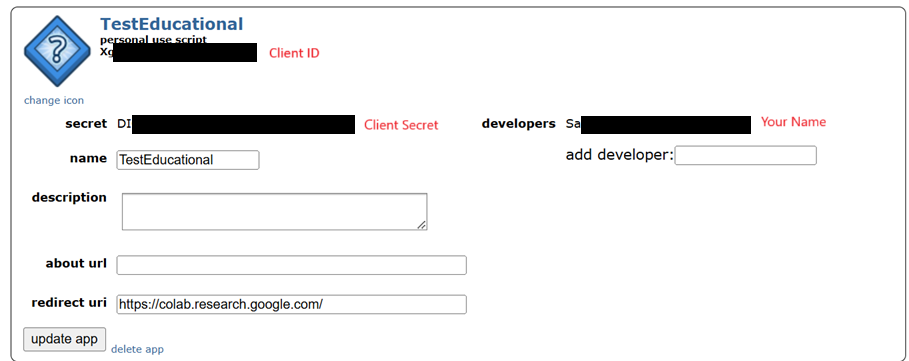

In [ ]:
# !pip install praw It is not installed in colab by default

In [1]:
import praw

reddit = praw.Reddit(
    client_id="TU_CLIENT_ID",
    client_secret="TU_CLIENT_SECRET",
    user_agent="TU_NOMBRE"
)

subreddit = reddit.subreddit("datascience")
for post in subreddit.hot(limit=10):
    print(f"Post Title: {post.title}\nPost URL: {post.url}\nPost Content: {post.selftext}")


ResponseException: received 401 HTTP response

Por contra, si queremos utilizar una solución más independiente y personalizada, podemos utilizar la librería requests de la siguiente manera:
1. Registrar la app en Reddit y obtener las credenciales de la misma forma
2. Autenticar y consumir endpoints usando requests.


In [ ]:
import requests
import base64

# Reddit API credentials
client_id = "TU_CLIENT_ID"
client_secret = "TU_CLIENT_SECRET"
app_name = "NOMBRE_APLICACION"
clinet_name = "TU_NOMBRE"

# Encode credentials for Basic Auth
auth_string = f"{client_id}:{client_secret}".encode("utf-8")
auth_b64 = base64.b64encode(auth_string).decode("utf-8")

# Request an access token
url_auth = "https://www.reddit.com/api/v1/access_token"
headers_auth = {
    "User-Agent": f"{app_name} by {clinet_name}",
    "Authorization": f"Basic {auth_b64}"
}
data_auth = {
    "grant_type": "client_credentials"
}

resp_auth = requests.post(url_auth, headers=headers_auth, data=data_auth)

if resp_auth.status_code == 200:
    token_json = resp_auth.json()
    access_token = token_json["access_token"]

    # Access subreddit data
    url_subreddit = "https://oauth.reddit.com/r/datascience/hot"
    headers_api = {
        "Authorization": f"bearer {access_token}",
        "User-Agent": f"{app_name} by {clinet_name}"
    }
    params = {"limit": 5}
    resp_data = requests.get(url_subreddit, headers=headers_api, params=params)

    if resp_data.status_code == 200:
        posts_json = resp_data.json()
        for post in posts_json["data"]["children"]:
            post_title = post["data"]["title"]
            post_url = post["data"]["url"]
            post_selftext = post["data"]["selftext"]
            print(f"Post Title: {post_title}\nPost URL: {post_url}\nPost Content: {post_selftext}\n")
    else:
        print("Error subreddit:", resp_data.status_code, resp_data.text)
else:
    print("Error auth:", resp_auth.status_code, resp_auth.text)


Como podemos ver, la implementación con requests es algo más compleja. Sin embargo, puede darnos mayor flexibilidad a la vez que reducimos dependencias con otras librerías.

En cada post, se tienen campos de texto como title, selftext (cuerpo del post), comments, etc. Similarmente, se pueden obtener comentarios e información de usuarios.


## Otras redes sociales
Además de X (Twitter) y Reddit, existen numerosas redes sociales que exponen sus APIs. De igual forma, cada una tiene peculiaridades en cuanto a la información que sirven, límites, precios, etc.
Las principales redes y sus referencias son:
-	Facebook e Instagram: son más restrictivas a nivel de API, se necesita permiso expreso o planes específicos. Tienen límites y requieren apps registradas. El contenido textual suele estar en posts, captions, comentarios.
  -	Facebook Graph API: https://developers.facebook.com/docs/graph-api
  -	Instagram API: https://developers.facebook.com/docs/instagram-platform  
-	YouTube: brinda API para extraer títulos, descripciones y comentarios de videos (posible caso de texto). Se autentica con Google Cloud credentials.
  -	YouTube Data API: https://developers.google.com/youtube/v3
-	LinkedIn: bastante restrictiva, orientada a planes “Talent Solutions” o “Marketing Developer”. No es habitual como fuente gratuita de datos, pero si se cuenta con permisos, el flujo es similar.
  -	LinkedIn developer portal: https://developer.linkedin.com/product-catalog
  -	LinkedIn Postman collections: https://www.postman.com/linkedin-developer-apis

En todos los casos, el formato de la respuesta es típicamente JSON. Se parsea con response.json() y luego se manipula según la estructura devuelta. Si queremos almacenar localmente, optamos por CSV o un formato más potente (Parquet, Avro) para su posterior análisis. Todo ello se puede realizar mediante el uso de librerías como Pandas como ya hemos visto en unidades anteriores, y que exploraremos en mayor profundidad a lo largo de esta unidad.
